<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


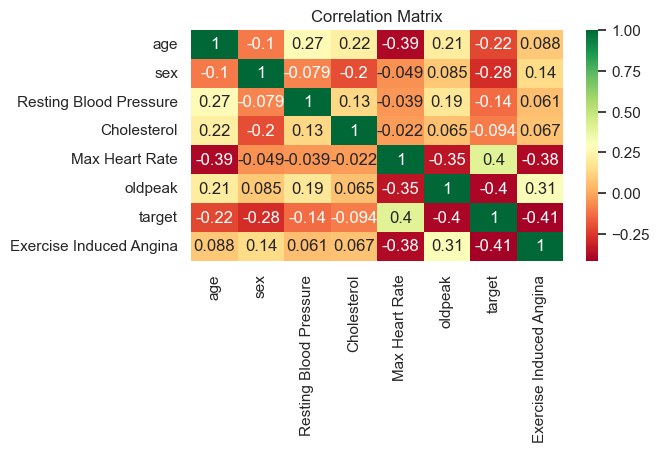

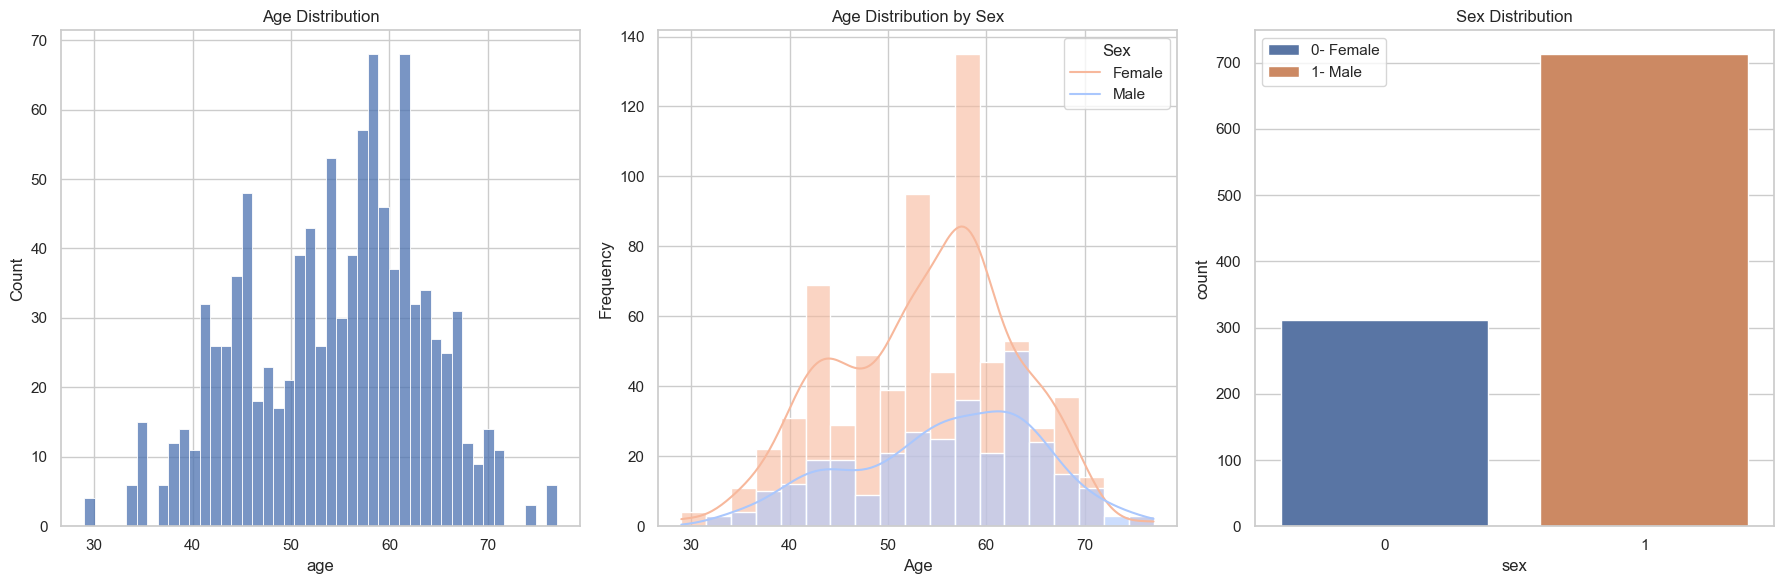

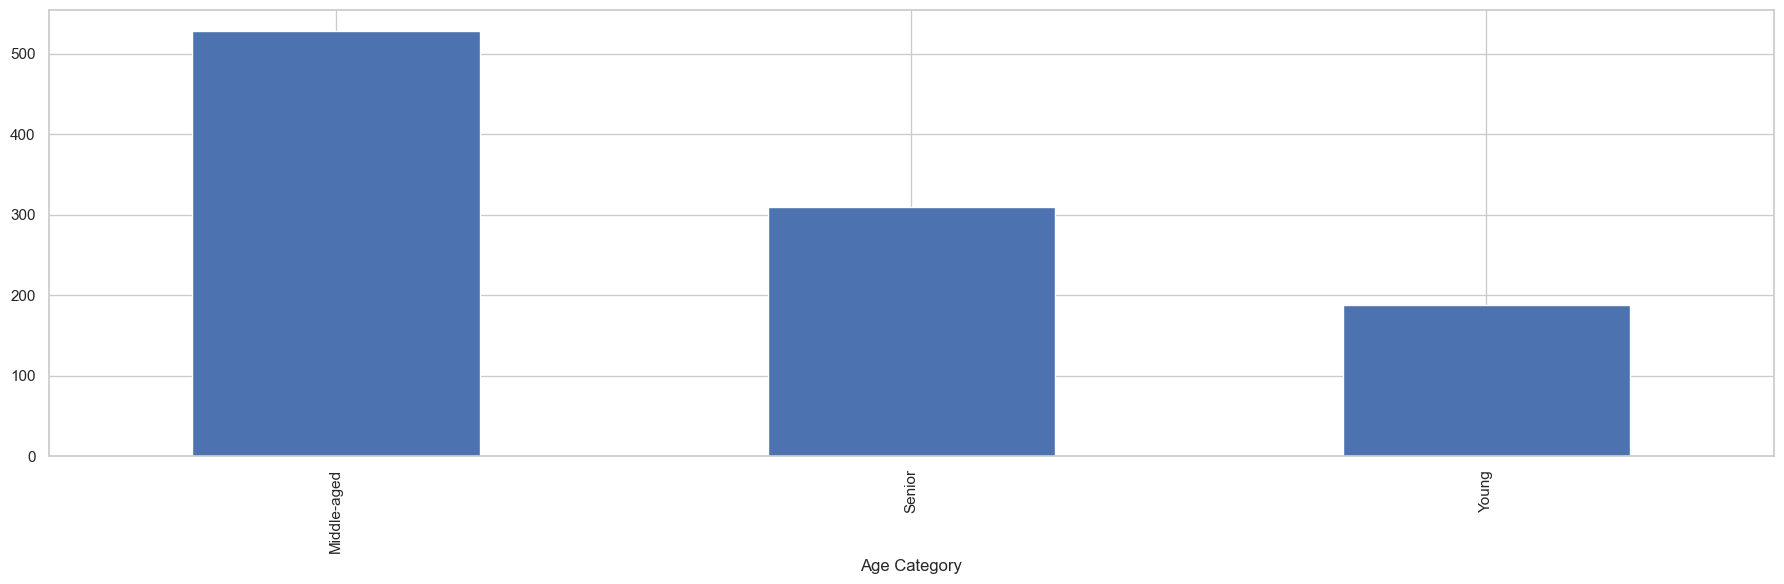

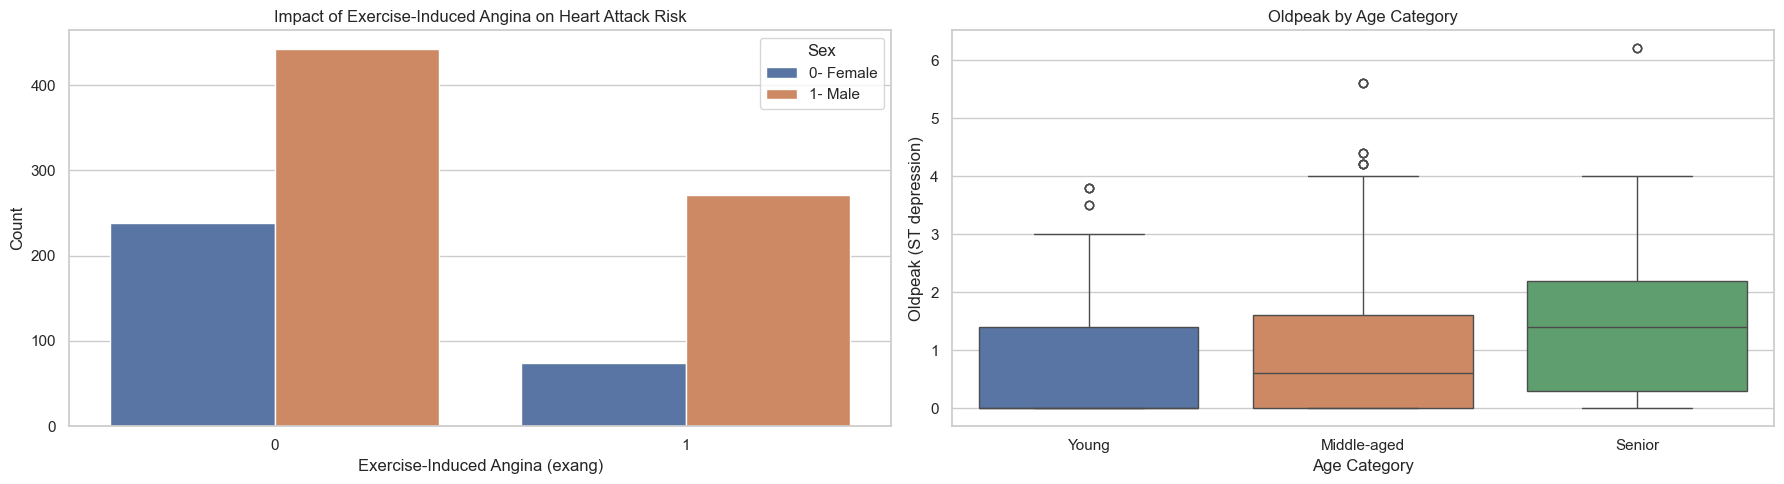

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("C:/Users/balajiallam/ML-AI/Datasets/heart.csv")
df.info()

#Rename columns to be more meaningful
df = df.rename(columns = {'cp': 'Chest Pain', 'trestbps':'Resting Blood Pressure','chol':'Cholesterol','fbs':'Blood Sugar','thalach':'Max Heart Rate','exang':'Exercise Induced Angina','slope':'ST Slope','ca':'Colored By Fluoroscopy','thal':'Thalassemia'})

# Select only specific columns 
numerical_col=['age','sex','Resting Blood Pressure','Cholesterol','Max Heart Rate','oldpeak','target','Exercise Induced Angina']

#Plot a heatmap/Correlation
plt.figure(figsize=(6,3))
sns.heatmap(df[numerical_col].corr(),annot=True,cmap="RdYlGn")
plt.title('Correlation Matrix')
plt.show()

#***********************************************************************************************************************

#Age distribution in data
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot
sns.histplot(x=df['age'], bins= 45)
plt.title('Age Distribution')

# Histogram for Age
plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
sns.histplot(data=df, x='age', hue='sex', palette='coolwarm', alpha=0.6, kde=True)
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Sex', labels=['Female', 'Male'])

#Sex distribution in data
plt.subplot(1, 3, 3)  # 1 row, 2 columns, second subplot
ax = sns.countplot(x=df['sex'], hue='sex', data=df)
plt.title('Sex Distribution')
plt.legend(labels =['0- Female', '1- Male'])

plt.tight_layout()
plt.show()


#***********************************************************************************************************************
#Categorize the age in the dataset into 3 separate bins - Young, Middle-aged, Senior
plt.figure(figsize=(18, 6))
# plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
bins = [29, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
#Plot histogram based on age categories - Young, Middle-aged, Senior
df['age_category'].value_counts().plot(kind='bar', xlabel ="Age Category")

plt.tight_layout()
plt.show()

#***********************************************************************************************************************
plt.figure(figsize=(18, 5))

#Plot count plot to show Exercise Induced Angina (high risk of heart attack under stress) among men and women; 0 represents no risk of
# Exercise Induced Angina and 1 represents risk of Exercise Induced Angina
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(x=df['Exercise Induced Angina'], hue='sex', data=df)
plt.title('Impact of Exercise-Induced Angina on Heart Attack Risk')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['0- Female', '1- Male'])

# Plotting oldpeak vs age_category
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(data=df, x='age_category', y='oldpeak', hue ='age_category')
plt.title('Oldpeak by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Oldpeak (ST depression)')

plt.tight_layout()
plt.show()
